# Deep Learning using MINST dataset

An introduction to deep learning using the MINST dataset to train the model to identify
handwritten digits.

## First step in deep learning with the MNIST data set

The purpose of this notebook is to take its first step in deep learning by reproducing  the results given on the [MNIST site](http://yann.lecun.com/exdb/mnist/). In less than 3 minutes, you will build and train a fully connected neural network (NN)
performing less than 1.5% error on the [MNIST database](http://yann.lecun.com/exdb/mnist/),
and then, in less than 15 minutes, a convolutional neural network
performing less than 1% error.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/440px-MnistExamples.png"
alt="MNIST data" width="240" height="180" border="1" />

From https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

from time import time

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### I. Load the MNIST data

The leader board:
http://yann.lecun.com/exdb/mnist/

https://nextjournal.com/gkoehler/pytorch-mnist


1. transforms.ToTensor() — converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor transforms.

2. transforms.Normalize() — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively. The values 0.1307 and 0.3081 used for the Normalize() transformation below are the global mean and standard deviation of the MNIST dataset, we'll take them as a given here.

In [3]:
from torchvision import datasets, transforms

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,)),
                              ])

In [5]:
train_set = datasets.MNIST('datasets/', download=True, train=True, transform=transform)
test_set = datasets.MNIST('datasets/', download=True, train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [6]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


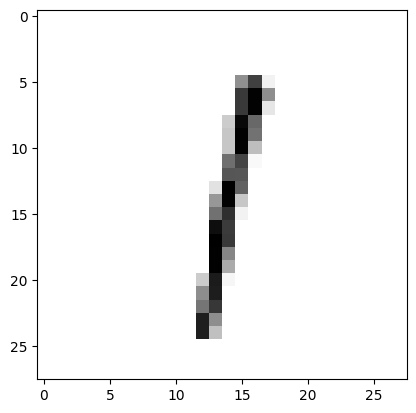

In [7]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [8]:
# Raw image array
print(np.round(images[0]- np.min(images[0].numpy())))

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 3.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

All images in the dataset are arrays of 28x28 pixels in black and white that represent
digits from 0 to 9. 
If we go through the images and graph them like the one above, you can recognize the
handwritten digits. They're not always very clear, but it is not hard for our brain
to identify what digit it is.

The goal of this exercise is to build a model that is also able to regognize them.

The following images will show some samples of the images we have to get a better
idea of what we're doing.

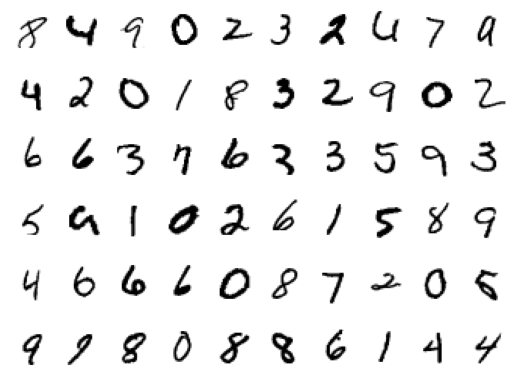

In [9]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

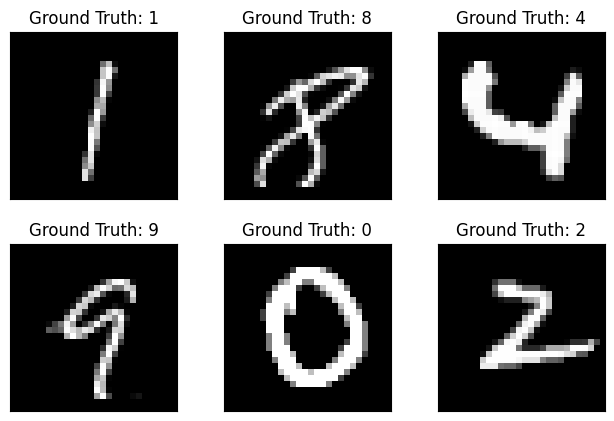

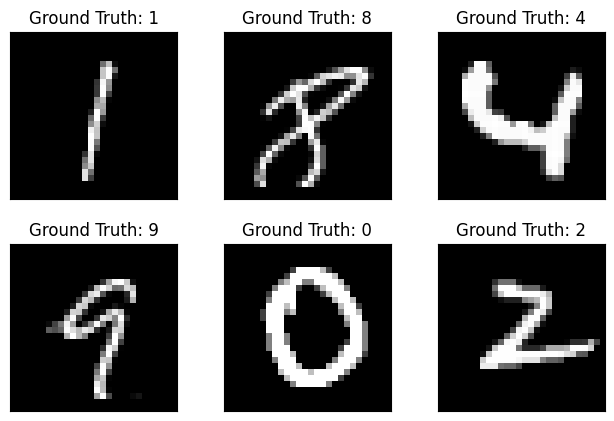

In [10]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

### II. Pytorch

In essence, a neuron is a linear function that has a threshold of activation with a
non-linear function. There are many functions that can be used to model this behaviour,
however, one of the most popular functions is the following because of it's simplicity.

$$ ReLU = \max(0,x) $$


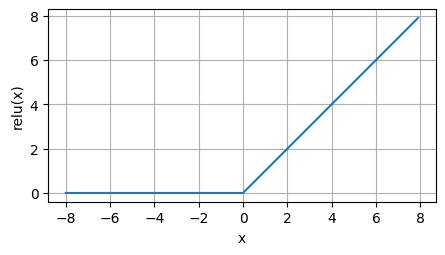

In [11]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)

plt.figure(figsize=(5,2.5))
plt.plot(x.detach(), y.detach())
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.grid()
plt.show()

In [12]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

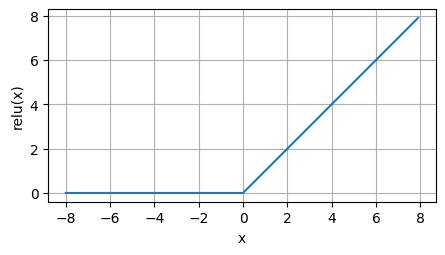

In [13]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
yf = relu(x)

plt.figure(figsize=(5,2.5))
plt.plot(x.detach(), yf.detach())
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.grid()
plt.show()

There are other functions that can be used.

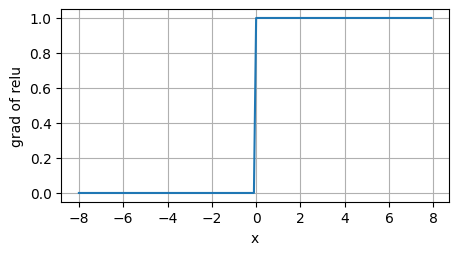

In [14]:
yf.backward(torch.ones_like(x), retain_graph=True)

plt.figure(figsize=(5,2.5))
plt.plot(x.detach(), x.grad)
plt.xlabel('x')
plt.ylabel('grad of relu')
plt.grid()
plt.show()

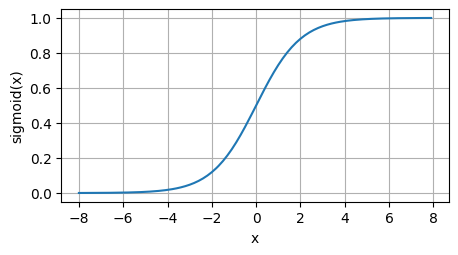

In [15]:
y = torch.sigmoid(x)

plt.figure(figsize=(5,2.5))
plt.plot(x.detach(), y.detach())
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.show()

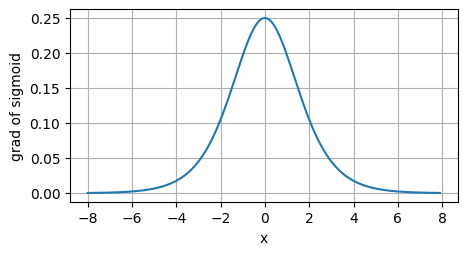

In [16]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)

plt.figure(figsize=(5,2.5))
plt.plot(x.detach(), x.grad)
plt.xlabel('x')
plt.ylabel('grad of sigmoid')
plt.grid()
plt.show()

## The actual neural network

I'll work out different models trying to improve different details and see how does the
performance of the model improve. The starting model has an error of about 5%, the goal
is to take it down to under 1.5%

So I'll go step by step with the first example that the teachet gave us, understand it,
and start modifying details and running the tests to improve it.

In [17]:
# Import things
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#### Initialize neural network

The first step is to initialize the architecture of the neural network. 
There are a lot of different architectures that define different organization of 
layers and hidden units in each layer. We'll be using simple Fast-forward architectures
without exploring things like convolution networks.

The first example done uses a 2 layer linear layers that uses 300 hidden units each.

In [18]:
input_size = 784
hidden_sizes = 300
output_size = 10

MLP_2HH_model = nn.Sequential(nn.Linear(input_size, hidden_sizes),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes, output_size),
                      nn.LogSoftmax(dim=1))
print(MLP_2HH_model)

Sequential(
  (0): Linear(in_features=784, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=10, bias=True)
  (3): LogSoftmax(dim=1)
)


In [19]:
optimizer = optim.SGD(MLP_2HH_model.parameters(), lr=0.01)
loss_func = nn.NLLLoss
# loss_func = F.cross_entropy
entropyepochs = 1
batch_size = 8

In [20]:
criterion = nn.NLLLoss()         # loss function
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logps = MLP_2HH_model(images)    # log probabilities
loss = criterion(logps, labels)  # calculate the NLL loss

In [21]:
print('Before backward pass: \n', MLP_2HH_model[0].weight.grad)
loss.backward()
print('After backward pass: \n', MLP_2HH_model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        ...,
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008]])


In [22]:
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:                   # Training pass on a mini batch

        images = images.view(images.shape[0], -1)         # Flatten MNIST images into a 784 long vector

        optimizer.zero_grad()                             #
        output = MLP_2HH_model(images)                    # Forward
        loss = criterion(output, labels)                  # Loss
        loss.backward()                                   # backpropagation (gradient computation)
        optimizer.step()                                  # weights (NN parameters) update

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.5648905614545858
Epoch 1 - Training loss: 0.29353638389693903
Epoch 2 - Training loss: 0.24418781287491576
Epoch 3 - Training loss: 0.21032823626992544
Epoch 4 - Training loss: 0.18485125941413044
Epoch 5 - Training loss: 0.16505337355217573
Epoch 6 - Training loss: 0.14885798210440987
Epoch 7 - Training loss: 0.1358591554058926
Epoch 8 - Training loss: 0.12492931885783796
Epoch 9 - Training loss: 0.11556605697035599
Epoch 10 - Training loss: 0.10742994255300906
Epoch 11 - Training loss: 0.10047928258371569
Epoch 12 - Training loss: 0.09401913552082328
Epoch 13 - Training loss: 0.08846592655611922
Epoch 14 - Training loss: 0.08336527462202761

Training Time (in minutes) = 2.7146666328112286


Correct Digit = 8
Predicted Digit = 8
Network output = [0.    0.    0.    0.    0.    0.001 0.    0.    0.998 0.   ]


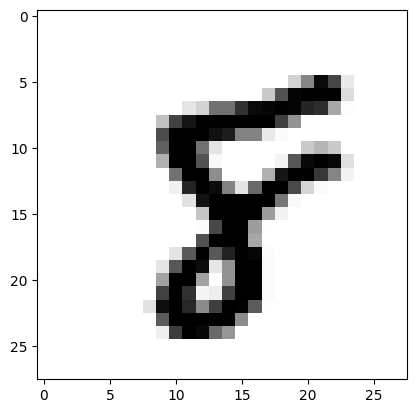

In [23]:
images, labels = next(iter(test_loader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = MLP_2HH_model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Correct Digit =", labels.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
print("Network output =", np.around(probab,3))

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

# view_classify(img.view(1, 28, 28), ps)

In [24]:
correct_count, all_count = 0, 0
for images,labels in test_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = MLP_2HH_model(img)


    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("Test Error Rate (%) 	 =", np.round(100*(1 - correct_count/all_count),2))

Number Of Images Tested = 10000
Test Error Rate (%) 	 = 2.72
